In [1]:
# Import basic libraries for data handling and machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('csv_finalCSVMulti.csv')
data.head()


,created_at,aid,extension,format,duration,FILE_STORED,FACIAL_ANALYSED,VOICE_ANALYSED,VOICE_TRANSCRIBED,BIOMETRICS_EXTRACTED,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,1745237541,3f241254-97fe-4886-8297-3838d272ea84,.mp4,video,52,True,True,True,True,True,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,1745237542,9e19679c-a1cb-4754-85ac-da0219e1398f,.mp4,video,60,True,True,True,True,True,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,1745237543,576c3f41-8d6a-402b-858a-54770ad42345,.mp4,video,51,True,True,True,True,True,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,1745237544,2bdea2f6-9cb8-4385-99e7-a4898b5b5391,.mp4,video,55,True,True,True,True,True,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,1745237545,c5d5a9fe-2dcb-4479-aec2-285d065cb55b,.mp4,video,45,True,True,True,True,True,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División estratificada train/test para que se mantenga balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalización (fit solo en train para evitar fugas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamaño train: {X_train.shape}, tamaño test: {X_test.shape}")


Tamaño train: (3159, 61), tamaño test: (790, 61)


In [3]:
# Create a working copy of the original DataFrame
df = data.copy()



In [4]:
# Drop metadata and processing-related columns (excluding 'language')
cols_to_drop = [
    'created_at', 'aid', 'extension', 'format', 'duration',
    'FILE_STORED', 'FACIAL_ANALYSED', 'VOICE_ANALYSED', 'VOICE_TRANSCRIBED',
    'BIOMETRICS_EXTRACTED', 'SPEECH_ANALYSED', 'PERSONALITY_ANALYSED',
    'FACES_EXTRACTED', 'id'
]

df.drop(columns=cols_to_drop, inplace=True)

# Check remaining number of columns
print(f"Number of columns after dropping: {df.shape[1]}")
df.head()





Number of columns after dropping: 68


,angry_facial,disgust_facial,fear_facial,happy_facial,sad_facial,surprise_facial,neutral_facial,most_frequent_dominant_emotion,dominant_emotion_counts_surprise,average_face_confidence,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,0.0003,0.0001,0.1684,0.1863,0.3184,0.0000,0.3265,sad,NaN,0.9600,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,0.0441,0.0001,0.0587,0.2474,0.1490,0.0262,0.4745,neutral,NaN,0.9150,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,0.0347,0.0000,0.1009,0.0003,0.4528,0.0000,0.4112,sad,NaN,0.9300,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,0.0066,0.0000,0.0686,0.0084,0.0150,0.0037,0.8976,neutral,NaN,0.9300,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,0.0118,0.0000,0.0192,0.0432,0.5066,0.0008,0.4183,neutral,NaN,0.9375,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [5]:
# Drop column with excessive missing values
df.drop(columns=['dominant_emotion_counts_surprise'], inplace=True)


In [6]:
# Fill missing values: use median for numeric columns and mode for categorical
columns_with_nulls = df.columns[df.isnull().any()].tolist()

for col in columns_with_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"ℹ️ Categorical column '{col}' filled with its mode")

# Confirm there are no missing values left
total_nulls = df.isnull().sum().sum()
print(f"\n✅ Remaining missing values: {total_nulls}")


ℹ️ Categorical column 'most_frequent_dominant_emotion' filled with its mode
ℹ️ Categorical column 'language' filled with its mode

✅ Remaining missing values: 0


In [7]:
# Show the distribution of the target variable
print(df['variable'].value_counts())


variable
Control      2433
Depresion    2260
Ansiedad     2233
Name: count, dtype: int64


In [8]:
# Separate features and target
X = df.drop(columns=['variable'])
y = df['variable']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Apply OneHotEncoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Categorical columns to encode: ['most_frequent_dominant_emotion', 'voice_mean_note', 'voice_median_note', 'voice_mode_note', 'voice_Q25_note', 'voice_Q75_note', 'language']


In [9]:
# Import the HGBClassifier and other necessary tools
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the baseline HGBClassifier
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train_scaled, y_train)

# Predict class labels and probabilities on the test set
y_pred = hgb_model.predict(X_test_scaled)
y_proba = hgb_model.predict_proba(X_test_scaled)

# Evaluate the model using classification report and accuracy
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")


📋 Classification Report:

              precision    recall  f1-score   support

    Ansiedad       0.87      0.88      0.87       447
     Control       0.96      0.92      0.94       487
   Depresion       0.87      0.90      0.89       452

    accuracy                           0.90      1386
   macro avg       0.90      0.90      0.90      1386
weighted avg       0.90      0.90      0.90      1386

✅ Accuracy: 0.9012


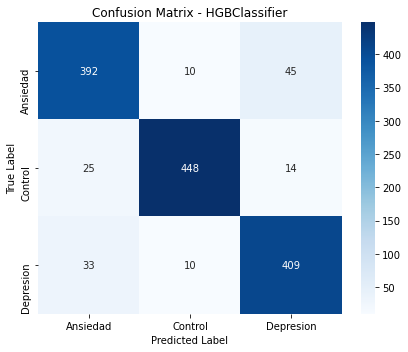

In [10]:
# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=hgb_model.classes_)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.set_palette("dark:#5A9_r")  # consistent palette
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=hgb_model.classes_, 
            yticklabels=hgb_model.classes_)

plt.title("Confusion Matrix - HGBClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


C:\Users\cscpd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cscpd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0, flags=flags)


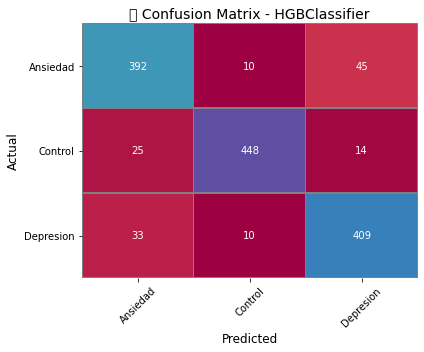

In [11]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=hgb_model.classes_)

# Plot the matrix with a vibrant palette
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral",
            xticklabels=hgb_model.classes_,
            yticklabels=hgb_model.classes_,
            linewidths=0.5, linecolor='gray', cbar=False)

plt.title("🎯 Confusion Matrix - HGBClassifier", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


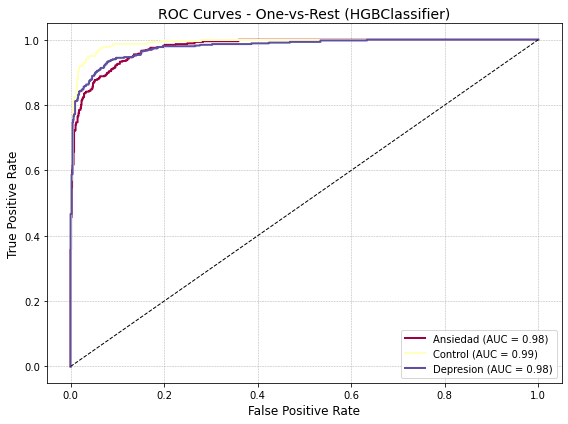

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Binarize the output labels
classes = hgb_model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a Spectral color cycle
spectral_colors = plt.cm.Spectral(np.linspace(0, 1, n_classes))

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), spectral_colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], "k--", lw=1)

plt.title("ROC Curves - One-vs-Rest (HGBClassifier)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


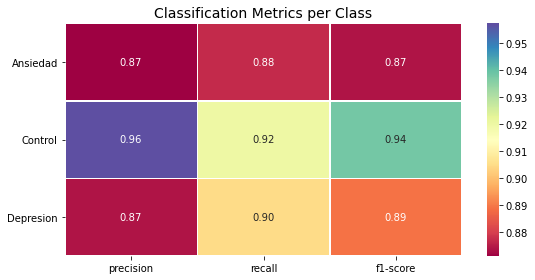

In [13]:
# Convert the classification report to a DataFrame
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report as dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Keep only target classes (exclude avg/total rows)
class_metrics = report_df.iloc[:n_classes, :3]  # precision, recall, f1-score

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(class_metrics, annot=True, cmap="Spectral", fmt=".2f", linewidths=0.5)
plt.title("Classification Metrics per Class", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


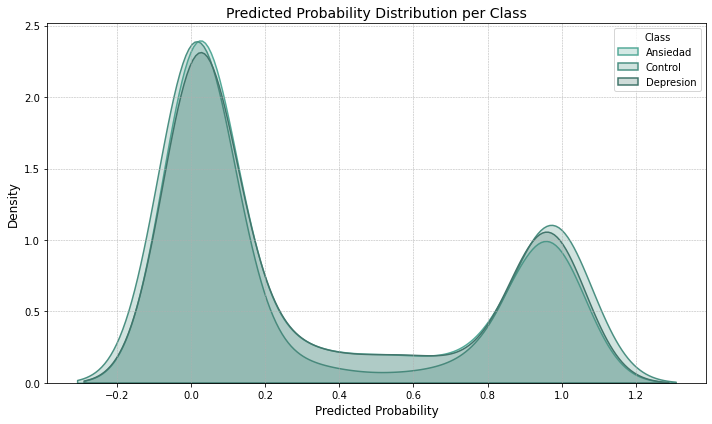

In [14]:
# Convert predicted probabilities to DataFrame
proba_df = pd.DataFrame(y_proba, columns=classes)

# Plot KDE of predicted probabilities per class
plt.figure(figsize=(10, 6))
for cls in classes:
    sns.kdeplot(proba_df[cls], fill=True, label=cls, linewidth=1.5)

plt.title("Predicted Probability Distribution per Class", fontsize=14)
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Class")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy.stats import randint, uniform
import time

# Define parameter grid specific to HGB
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(100, 500),
    'max_leaf_nodes': randint(20, 100),
    'max_depth': randint(5, 15),
    'min_samples_leaf': randint(10, 50),
    'l2_regularization': uniform(0.0, 1.0),
    'early_stopping': [True]
}

# Initialize base model
hgb = HistGradientBoostingClassifier(random_state=42)

# Setup randomized search
random_search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings to sample
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=42
)

# Time the tuning process
start = time.time()
random_search.fit(X_train_scaled, y_train)
end = time.time()

print(f"\n⏱️ RandomizedSearchCV completed in {end - start:.2f} seconds")
print("🔍 Best Parameters:\n", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits

⏱️ RandomizedSearchCV completed in 136.49 seconds
🔍 Best Parameters:
 {'early_stopping': True, 'l2_regularization': 0.27472179299006416, 'learning_rate': 0.17837302775431035, 'max_depth': 7, 'max_iter': 200, 'max_leaf_nodes': 66, 'min_samples_leaf': 23}


In [16]:
# Get the best model from the randomized search
best_hgb = random_search.best_estimator_

# Predict labels and probabilities on the test set
y_pred_best = best_hgb.predict(X_test_scaled)
y_proba_best = best_hgb.predict_proba(X_test_scaled)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score
print("📋 Classification Report (Tuned Model):\n")
print(classification_report(y_test, y_pred_best))
print(f"✅ Accuracy (Tuned Model): {accuracy_score(y_test, y_pred_best):.4f}")


📋 Classification Report (Tuned Model):

              precision    recall  f1-score   support

    Ansiedad       0.87      0.85      0.86       447
     Control       0.93      0.92      0.92       487
   Depresion       0.85      0.88      0.87       452

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386

✅ Accuracy (Tuned Model): 0.8831


C:\Users\cscpd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127931 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cscpd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127931 missing from current font.
  font.set_text(s, 0, flags=flags)


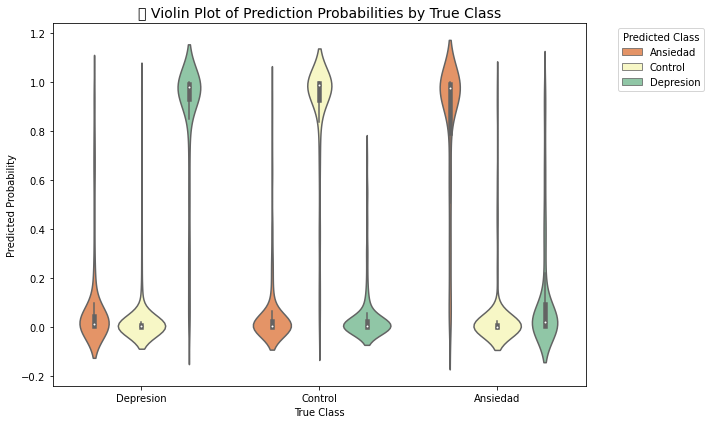

In [20]:
# Recreate the probability DataFrame
proba_df = pd.DataFrame(y_proba_best, columns=best_hgb.classes_)
proba_df["True_Class"] = y_test.reset_index(drop=True)

# Melt for plotting
proba_melt = pd.melt(proba_df, id_vars=["True_Class"],
                     var_name="Predicted_Class", value_name="Probability")

# Plot violin plot with Spectral palette
plt.figure(figsize=(10, 6))
sns.violinplot(data=proba_melt,
               x="True_Class",
               y="Probability",
               hue="Predicted_Class",
               palette="Spectral")

plt.title("🎻 Violin Plot of Prediction Probabilities by True Class", fontsize=14)
plt.ylabel("Predicted Probability")
plt.xlabel("True Class")
plt.legend(title="Predicted Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



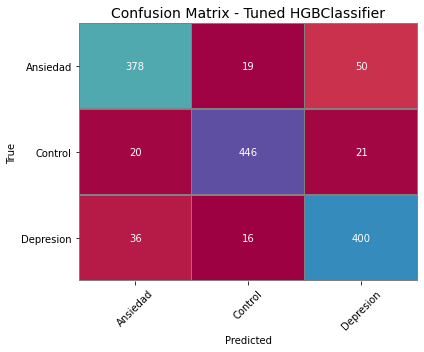

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for the tuned model
cm_best = confusion_matrix(y_test, y_pred_best, labels=best_hgb.classes_)

# Plot the confusion matrix with Spectral color palette
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Spectral",
            xticklabels=best_hgb.classes_,
            yticklabels=best_hgb.classes_,
            linewidths=0.5, linecolor='gray', cbar=False)

plt.title("Confusion Matrix - Tuned HGBClassifier", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


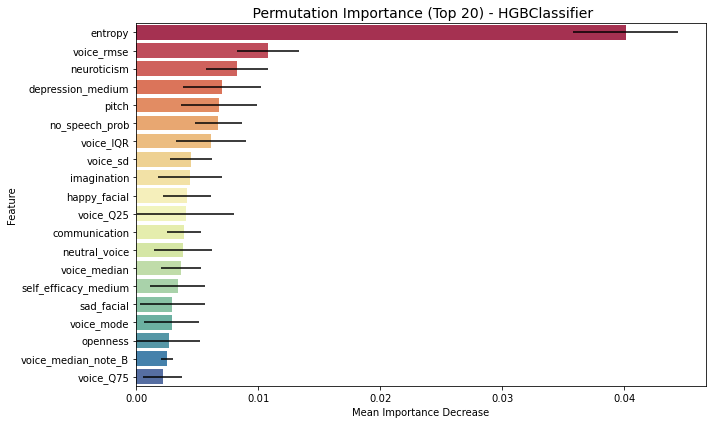

In [37]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute permutation importance (this may take a minute)
result = permutation_importance(
    best_hgb, X_test_scaled, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Create DataFrame
perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
})

# Sort and select top 20
top_perm = perm_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_perm, x='Importance', y='Feature', palette='Spectral', xerr=top_perm['Std'])
plt.title(" Permutation Importance (Top 20) - HGBClassifier", fontsize=14)
plt.xlabel("Mean Importance Decrease")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [25]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


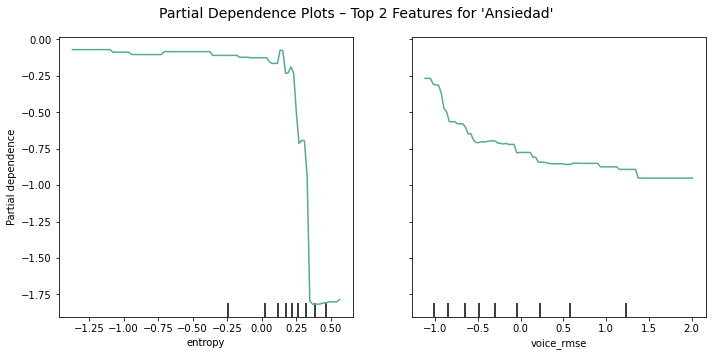

In [36]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Wrap X_test_scaled into DataFrame with correct feature names
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Select top 2 features from permutation importance
top2_features = top_perm['Feature'].iloc[:2].tolist()

# Plot PDP for a specific class (e.g., 'Ansiedad')
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    estimator=best_hgb,
    X=X_test_df,
    features=top2_features,
    feature_names=X_train.columns,
    target='Ansiedad',  # <- specify the class you're interested in
    ax=ax
)

plt.suptitle("Partial Dependence Plots – Top 2 Features for 'Ansiedad'", fontsize=14)
plt.tight_layout()
plt.show()



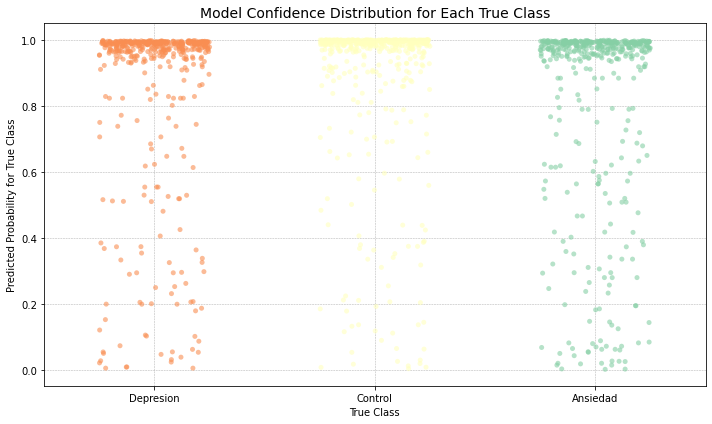

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get model confidence for the true class only
true_conf = [y_proba_best[i, list(best_hgb.classes_).index(label)] for i, label in enumerate(y_test)]
df_conf = pd.DataFrame({
    "True_Class": y_test.reset_index(drop=True),
    "Confidence": true_conf
})

# Strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_conf, x="True_Class", y="Confidence", jitter=0.25, alpha=0.6, palette="Spectral")
plt.title("Model Confidence Distribution for Each True Class", fontsize=14)
plt.ylabel("Predicted Probability for True Class")
plt.xlabel("True Class")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


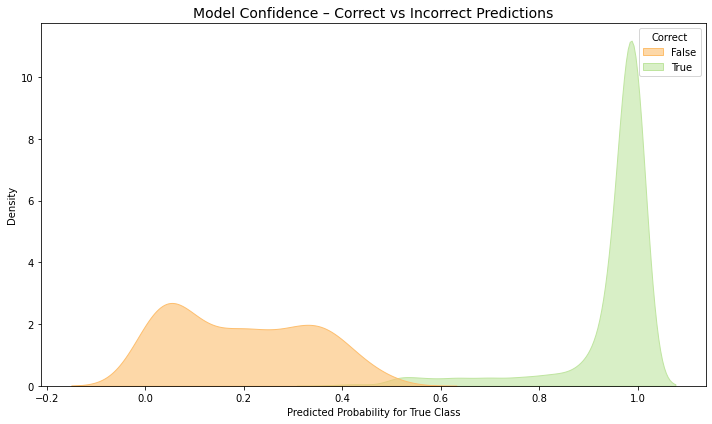

In [33]:
# Ensure matching lengths by resetting index on both sides
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred_best).reset_index(drop=True)

# Identify errors
errors = y_pred_reset != y_test_reset

# Build DataFrame with proper alignment
df_errors = pd.DataFrame({
    "True_Class": y_test_reset,
    "Predicted_Class": y_pred_reset,
    "Confidence": true_conf,  # Already aligned with test set
    "Correct": ~errors
})

# KDE plot of confidence by correctness
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_errors, x="Confidence", hue="Correct", fill=True, common_norm=False, palette="Spectral", alpha=0.6)
plt.title("Model Confidence – Correct vs Incorrect Predictions", fontsize=14)
plt.xlabel("Predicted Probability for True Class")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


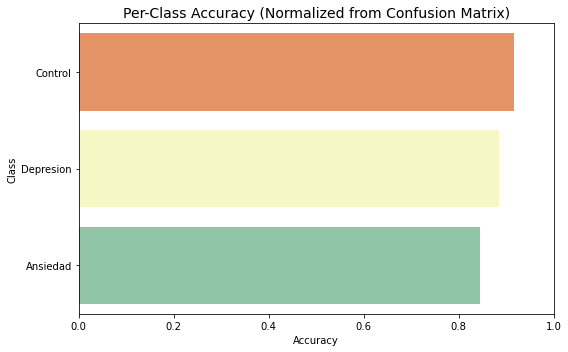

In [34]:
from sklearn.metrics import confusion_matrix

# Compute normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=best_hgb.classes_)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Create summary DataFrame
df_summary = pd.DataFrame({
    "Class": best_hgb.classes_,
    "Accuracy": class_accuracy
}).sort_values(by="Accuracy", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_summary, x="Accuracy", y="Class", palette="Spectral")
plt.title("Per-Class Accuracy (Normalized from Confusion Matrix)", fontsize=14)
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()
